In [103]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# dir_list = os.listdir("./../out/corrected/counts")
# print("Directories we will be working with: ", dir_list)

# data = {}
# print("Total number of files: ", len(dir_list))
# rounds = {}

# for dir in dir_list:
#     if not re.findall("aav2.*", dir):
#         temp = re.findall(".*np-cc_aa-seq-counts.*", dir)
#         if temp:
#             if "norm" in data:
#                 data["norm"].append(temp[0])
#             else:
#                 data["norm"] = [temp[0]]
#             continue
        
#         temp = re.findall(".*np-cc_gel-extract_aa-seq-counts.*", dir)
#         if temp:
#             if "gel" in data:
#                 data["gel"].append(temp[0])
#             else:
#                 data["gel"] = [temp[0]]
#             continue

#         temp = re.findall(".*np-cc_repeat_aa-seq-counts.*", dir)
#         if temp:
#             if "repeat" in data:
#                 data["repeat"].append(temp[0])
#             else:
#                 data["repeat"] = [temp[0]]
#             continue
#         #############################
#         temp = re.findall("r0_np-cc_repeat_aa-seq-counts.*", dir)
#         if temp:
#             if "r0" in data:
#                 data["r0"].append(temp[0])
#             else:
#                 data["r0"] = [temp[0]]
#             continue

#         temp = re.findall("r0_np-cc_gel-extract_aa-seq-counts.*", dir)
#         if temp:
#             if "r0" in data:
#                 data["r0"].append(temp[0])
#             else:
#                 data["r0"] = [temp[0]]
#             continue

#         temp = re.findall("r0_np-cc_aa-seq-counts.*", dir)
#         if temp:
#             if "r0" in data:
#                 data["r0"].append(temp[0])
#             else:
#                 data["r0"] = [temp[0]]
#             continue

# print("Number of \"matches\": ", len(data))

# sum = 0
# for d in data:
#     sum += len(data[d])

# print("Number of files we will be working on: ", sum)
# print(data)


In [115]:
# In this version I match all of the r0 read to all of the r1 and r5 reads 
# (i.e. I don't section them by file name)

# TODO: should I drop duplicates? YES (this is your answer not Suzanne's)


rounds = {'r0': ['2024-06-05_r0_np-cc_repeat_aa-seq-counts.tsv.gz', '2024-06-05_r0_np-cc_aa-seq-counts.tsv.gz', '2024-06-05_r0_np-cc_gel-extract_aa-seq-counts.tsv.gz'], 'r1': ['2024-06-05_r1_np-cc_gel-extract_aa-seq-counts.tsv.gz', '2024-06-05_r1_np-cc_aa-seq-counts.tsv.gz', ], 'r5': ['2024-06-05_r5_np-cc_aa-seq-counts.tsv.gz']}

# Empty data frames to hold the sequenced reads of each round
r0 = pd.DataFrame()
r1 = pd.DataFrame()
r5 = pd.DataFrame()

# Combine all of the reads of all of the rounds into the empy data frames above
for r in rounds:
    if r == 'r0':
        for file in rounds[r]:
            print("this ir r0: ", file)
            if len(r0) == 0:
                r0 = pd.read_csv("./../out/corrected/counts/" + file, sep='\t')
                ####################################
                # r0 = pd.read_csv("./../out/corrected/counts/" + file, sep='\t').rename(columns={'count':'r0'})
            else:
                new_read = pd.read_csv("./../out/corrected/counts/" + file, sep='\t')

                r0 = pd.merge(r0, new_read, how='outer', on='sequence', suffixes=('_r0','_new'))
                r0.fillna(0, inplace=True)
                r0['count'] = r0['count_r0'] + r0['count_new']
                r0.drop(columns=['count_r0', 'count_new'], inplace=True)
    elif r == 'r1':
        for file in rounds[r]:
            print("this ir r1: ", file)
            if len(r1) == 0:
                r1 = pd.read_csv("./../out/corrected/counts/" + file, sep='\t')
            else:
                new_read = pd.read_csv("./../out/corrected/counts/" + file, sep='\t')

                r1 = pd.merge(r1, new_read, how='outer', on='sequence', suffixes=('_r1','_new'))
                r1.fillna(0, inplace=True)
                r1['count'] = r1['count_r1'] + r1['count_new']
                r1.drop(columns=['count_r1', 'count_new'], inplace=True)
            
        
    elif r == 'r5':
        for file in rounds[r]:
            print("this ir r5: ", file)
            if len(r5) == 0:
                r5 = pd.read_csv("./../out/corrected/counts/" + file, sep='\t')
            else:
                new_read = pd.read_csv("./../out/corrected/counts/" + file, sep='\t')

                r5 = pd.merge(r5, new_read, how='outer', on='sequence', suffixes=('_r5','_new'))
                r5.fillna(0, inplace=True)
                r5['count'] = r5['count_r5'] + r5['count_new']
                r5.drop(columns=['count_r5', 'count_new'], inplace=True)

this ir r0:  2024-06-05_r0_np-cc_repeat_aa-seq-counts.tsv.gz
this ir r0:  2024-06-05_r0_np-cc_aa-seq-counts.tsv.gz
this ir r0:  2024-06-05_r0_np-cc_gel-extract_aa-seq-counts.tsv.gz
this ir r1:  2024-06-05_r1_np-cc_gel-extract_aa-seq-counts.tsv.gz
this ir r1:  2024-06-05_r1_np-cc_aa-seq-counts.tsv.gz
this ir r5:  2024-06-05_r5_np-cc_aa-seq-counts.tsv.gz


In [116]:
r0.columns

Index(['sequence', 'count'], dtype='object')

In [117]:
r0.describe()

,count
count,801140.000000
mean,1.175032
std,1.224081
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,344.000000


In [118]:
r0.rename(columns={'count':'r0'}, inplace=True)
r1.rename(columns={'count':'r1'}, inplace=True)
r5.rename(columns={'count':'r5'}, inplace=True)

# r0_sum = r0['r0'].sum()
# r1_sum = r1['r1'].sum()
# r5_sum = r5['r5'].sum()

r0_sum = np.sum(r0['r0'])
r1_sum = np.sum(r1['r1'])
r5_sum = np.sum(r5['r5'])

# r0['r0'] = np.log(r0['r0']) / r0_sum
# r1['r1'] = np.log(r1['r1']) / r1_sum
# r5['r5'] = np.log(r5['r5']) / r5_sum

r0['r0'] = r0['r0'] / r0_sum
r1['r1'] = r1['r1'] / r1_sum
r5['r5'] = r5['r5'] / r5_sum

In [119]:
print(r0_sum)
# print("r0: ", r0)
print("r1: ", r1)
# print("r5: ", r5)

941365.0
r1:                                                   sequence        r1
0       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNARGLV...  0.000002
1       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNRRGLV...  0.000002
2       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNRRGLV...  0.000002
3       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQKQDDGRGLV...  0.000002
4       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQKQDDGRGLV...  0.000002
...                                                   ...       ...
442221  MAADGYLPDWLEDTLSEGISEWWALKPGVPQPKANQQHQDNRRGLV...  0.000002
442222  MAADGYLPDWLEDTLSEGISEWWALKPGVPQPKANQQHQDNRRGLV...  0.000002
442223  MAADGYLPDWLEDTLSEGISEWWKLKPGPPPPKPAERHKDDGRGLV...  0.000002
442224  MAADGYLPDWLEDTLSEGISEWWKLKPGPPPPKPAERHQDNSRGLV...  0.000002
442225  MAADGYLPDWLEDTLSEGISQWWKLKPGPPPPKPAERHKDDSRGLV...  0.000002

[442226 rows x 2 columns]


In [120]:
# Merge them into a DataFrame
merged_0_1 = pd.merge(r0, r1, on='sequence')
merged_0_5 = pd.merge(r0, r5, on='sequence')

In [121]:
merged_0_1

,sequence,r0,r1
0,MAADGYLPDWLEDNLSEGIREWWALKPGAPKPKANQQHQDDSRGLV...,0.000003,0.000002
1,MAADGYLPDWLEDNLSEGIREWWALKPGAPKPKANQQHQDDSRGLV...,0.000006,0.000003
2,MAADGYLPDWLEDNLSEGIREWWALKPGAPKPKANQQHQDNARGLV...,0.000001,0.000002
3,MAADGYLPDWLEDNLSEGIREWWALKPGAPKPKANQQHQDNARGLV...,0.000001,0.000002
4,MAADGYLPDWLEDNLSEGIREWWALKPGAPKPKANQQHQDNARGLV...,0.000001,0.000002
...,...,...,...
26261,MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQHQDNRRGLV...,0.000001,0.000002
26262,MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQHQDNRRGLV...,0.000001,0.000002
26263,MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQHQDNRRGLV...,0.000001,0.000002
26264,MAADGYLPDWLEDTLSEGIRQWWKLKPGVPQPKANQQHQDNRRGLV...,0.000001,0.000005


In [122]:
merged_0_1.fillna(0, inplace=True)
merged_0_5.fillna(0, inplace=True)

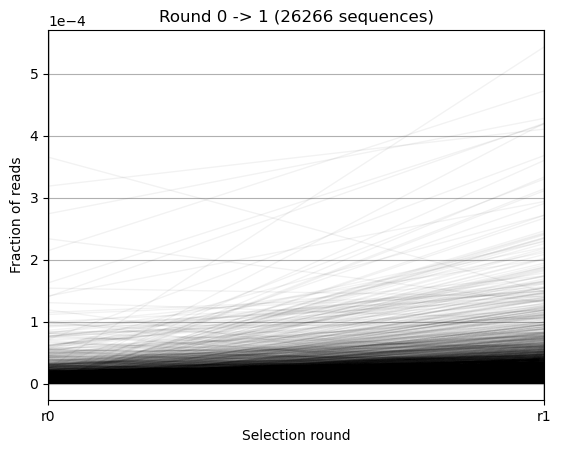

In [123]:
# Make ro -> r1 plot replacation_of_ro_to_r1_plot-v2.png
plt.plot(alpha = 0.3)
graph = pd.plotting.parallel_coordinates(merged_0_1, "sequence", color='black', linewidth=1, alpha = 0.05)


plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.title(f"Round 0 -> 1 ({len(merged_0_1)} sequences)")
graph.legend_ = None
plt.ylabel("Fraction of reads")
plt.xlabel("Selection round")


plt.savefig('./replacation_of_ro_to_r1_plot-v2.png')

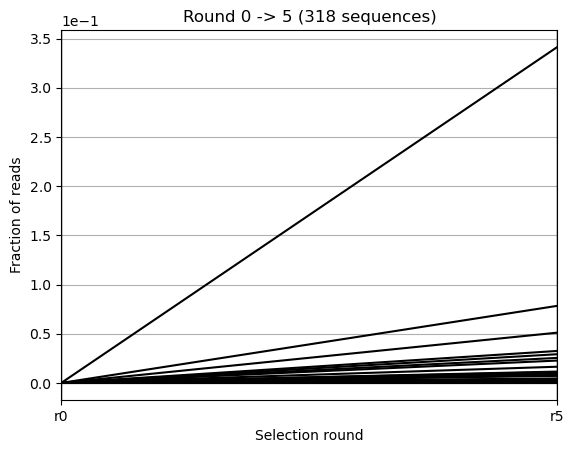

In [124]:
# Make r0 -> r5 plot and save it into replacation_of_ro_to_r5_plot-v2.png

graph = pd.plotting.parallel_coordinates(merged_0_5, "sequence", color='black')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.title(f"Round 0 -> 5 ({len(merged_0_5)} sequences)")
graph.legend_ = None
plt.ylabel("Fraction of reads")
plt.xlabel("Selection round")


plt.savefig('./replacation_of_ro_to_r5_plot-v2.png')

In [125]:
r0['round'] = 'r0'
r1['round'] = 'r1'
r5['round'] = 'r5'


r0.rename(columns={'r0' : 'Fraction of reads'}, inplace=True)
r1.rename(columns={'r1' : 'Fraction of reads'}, inplace=True)
r5.rename(columns={'r5' : 'Fraction of reads'}, inplace=True)

test = pd.concat([r0, r1, r5])

In [126]:
# print(len(test))
# print(test)
print(r0)

                                                 sequence  Fraction of reads  \
0       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNARGLV...           0.000001   
1       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNARGLV...           0.000001   
2       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNARGLV...           0.000001   
3       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNARGLV...           0.000001   
4       MAADGYLPDWLEDNLCEGIREWWALKPGAPKPKANQQHQDNRRGLV...           0.000001   
...                                                   ...                ...   
801135  MAADGYLPDWLEDTLSEGIRQWWTLKPGVPQPKANQQHQDNRRGLV...           0.000001   
801136  MAADGYLPDWLEDTLSEGIRQWWTLKPGVPQPKANQQHQDNRRGLV...           0.000001   
801137  MAADGYLPDWLEDTLSEGISEWWALKPGAPKPKANQQKQDDGRGLV...           0.000001   
801138  MAADGYLPDWLEDTLSEGISEWWKLKPGPPPPKPAERHKDDSRGLV...           0.000001   
801139  MAADGYLPDWLEDTLSEGISQWWKLKPGPPPPKPAERHKDDSRGLV...           0.000001   

       round  
0         r0  
1        

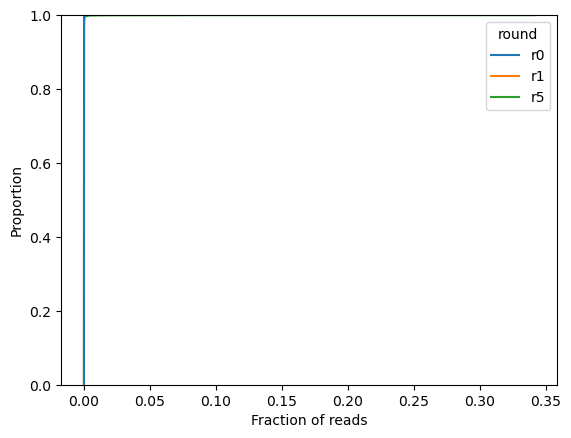

In [127]:
sns.ecdfplot(data=test, x="Fraction of reads", hue="round")

plt.savefig("proportion_of_high_count_sequences.png")
